# Q1

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the models
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# Train and evaluate the models
X_train = pd.read_csv('Training.csv').drop(['prognosis','Unnamed: 133'], axis=1)
X_test = pd.read_csv('testing.csv').drop('prognosis', axis=1)
y_train = pd.read_csv('Training.csv')['prognosis']
y_test = pd.read_csv('testing.csv')['prognosis']

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)
print(f"================== Training ==================")
print(f"Logistic Regression score: {lr_score}")
print(f"Random Forest score: {rf_score}")
print(f"SVM score: {svm_score}")


# Compute evaluation metrics

y_true = pd.DataFrame(y_test)
accuracy = accuracy_score(y_true, lr_pred)
precision = precision_score(y_true, lr_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, lr_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, lr_pred, average='weighted', zero_division=0)
print(f"================== Evaluation ==================")
print(f"Logistic Regression")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


y_true = pd.DataFrame(y_test)
accuracy = accuracy_score(y_true, rf_pred)
precision = precision_score(y_true, rf_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, rf_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, rf_pred, average='weighted', zero_division=0)
print(f"================================================")
print(f"Random Forest score")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


y_true = pd.DataFrame(y_test)
accuracy = accuracy_score(y_true, svm_pred)
precision = precision_score(y_true, svm_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, svm_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, svm_pred, average='weighted', zero_division=0)
print(f"================================================")
print(f"SVM")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

================== Training ==================
Logistic Regression score: 1.0
Random Forest score: 0.9761904761904762
SVM score: 1.0
================== Evaluation ==================
Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Random Forest score
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 score: 0.9761904761904762
SVM
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


# Q2

In [45]:
# Hyperparameter tuning is the process of finding the best values for the hyperparameters of a model
from sklearn.model_selection import GridSearchCV

X_train = pd.read_csv('Training.csv').drop(['prognosis','Unnamed: 133'], axis=1)
X_test = pd.read_csv('testing.csv').drop('prognosis', axis=1)
y_train = pd.read_csv('Training.csv')['prognosis']
y_test = pd.read_csv('testing.csv')['prognosis']

# Define the hyperparameters to search over
param_grid = {
"C": [0.1, 1, 10],
"penalty": ["l1", "l2"]
}

# Instantiate the logistic regression model
lr = LogisticRegression()

# Perform grid search using cross-validation
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model_score = best_model.score(X_test, y_test)
print(f"Best model score: {best_model_score}")

# ii) Prevent overfitting in a classification model

# Overfitting is when a model fits the training data too closely and does not generalize well to new data
from sklearn.model_selection import cross_val_score

# Instantiate the logistic regression model
lr = LogisticRegression()

# Evaluate the model using cross-validation
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Calculate the mean cross-validation score
mean_score = scores.mean()
print(f"Mean cross-validation score: {mean_score}")

Best model score: 1.0
Mean cross-validation score: 1.0


# Q3

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data into a pandas DataFrame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# dropna
df = df.drop(df[df.TotalCharges == ' '].index)

# Replace empty strings with NaN or 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='raise')
df['TotalCharges'].fillna(0, inplace=True)

# Perform data preprocessing
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'])
# Scale continuous variables
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Split data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model with L1 regularization
lr = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)
lr_l1 = grid_search.best_estimator_

# Fit logistic regression model with L2 regularization
lr = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lr, params, cv=5)
grid_search.fit(X_train, y_train)
lr_l2 = grid_search.best_estimator_

# Evaluate model performance on test set
y_pred_l1 = lr_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print('Accuracy (L1 regularization):', acc_l1)

y_pred_l2 = lr_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print('Accuracy (L2 regularization):', acc_l2)

Accuracy (L1 regularization): 0.7860696517412935
Accuracy (L2 regularization): 0.7839374555792467


# Q5 

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

data = np.array([(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)])

distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

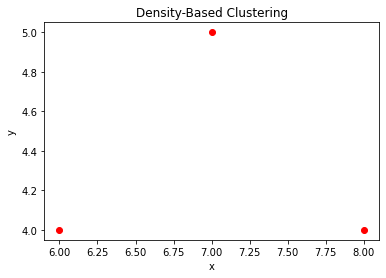

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

data = np.array([(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)])

dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit(data)

labels = dbscan.labels_
clusters = []
for i in range(len(set(labels))):
    clusters.append(data[labels == i])

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black']
for i in range(len(clusters)):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], color=colors[i])
plt.title('Density-Based Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()